<a href="https://colab.research.google.com/github/SilentSnowman/CANSAT2024/blob/Arduino-Code/Temeprature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Data/temp/temp2021.csv')

In [ ]:
df

,date,hour,BKUG,NIKS,KYKT,BCAP,RMPT,PKTG,KKCN,UDMS,...,SDO002,ONWR01,TADE01,SKN001,KPNT,SDO001,AIT001,KWN003,PATO01,PWA004
0,1,0,-999.0,19.1,20.1,18.2,19.0,16.3,18.2,17.4,...,NaN,20.8,NaN,NaN,14.7,NaN,24.1,21.7,NaN,20.6
1,1,1,-999.0,17.9,19.3,17.6,18.1,15.4,18.3,16.0,...,NaN,20.6,NaN,NaN,14.5,NaN,23.5,21.2,NaN,20.1
2,1,2,-999.0,19.1,19.0,17.2,17.6,15.0,20.6,15.2,...,NaN,17.9,NaN,NaN,14.1,NaN,22.8,20.6,NaN,19.5
3,1,3,-999.0,18.6,19.2,16.9,17.1,14.5,20.7,14.9,...,NaN,16.8,NaN,NaN,13.4,NaN,22.4,19.8,NaN,20.5
4,1,4,-999.0,16.9,18.8,17.7,17.3,14.1,20.7,15.1,...,NaN,18.4,NaN,NaN,12.9,NaN,21.9,19.9,NaN,19.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,365,19,22.6,-999.0,26.1,23.4,-999.0,-999.0,24.2,-999.0,...,NaN,23.0,25.63,23.8,-999.0,NaN,29.8,26.9,26.05,27.4
8756,365,20,21.5,-999.0,24.7,22.2,-999.0,-999.0,22.7,-999.0,...,NaN,21.0,25.57,23.7,-999.0,NaN,-999.0,26.0,25.83,26.2
8757,365,21,21.3,-999.0,24.6,21.8,-999.0,-999.0,21.6,-999.0,...,NaN,20.0,25.81,23.7,-999.0,NaN,29.2,26.2,25.62,25.7
8758,365,22,20.9,-999.0,24.3,21.6,-999.0,-999.0,21.2,-999.0,...,NaN,19.5,25.81,23.7,-999.0,NaN,29.0,25.9,24.90,24.6


In [ ]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

df = df.replace(-999.0, np.nan)
threshold = 5000

df = df.dropna(thresh=threshold, axis='columns')
imputer = IterativeImputer(estimator=LinearRegression())

df

,date,hour,BKUG,NIKS,KYKT,BCAP,PKTG,KKCN,UDMS,NGPH,...,BKC008,BKC006,FROC02,FROC01,CAN001,ONWR01,KPNT,AIT001,KWN003,PWA004
0,1,0,NaN,19.1,20.1,18.2,16.3,18.2,17.4,14.1,...,22.8,23.4,21.0,21.9,21.1,20.8,14.7,24.1,21.7,20.6
1,1,1,NaN,17.9,19.3,17.6,15.4,18.3,16.0,13.6,...,22.1,22.7,20.2,21.1,21.0,20.6,14.5,23.5,21.2,20.1
2,1,2,NaN,19.1,19.0,17.2,15.0,20.6,15.2,13.3,...,21.4,21.5,19.7,20.3,20.3,17.9,14.1,22.8,20.6,19.5
3,1,3,NaN,18.6,19.2,16.9,14.5,20.7,14.9,13.0,...,20.7,21.0,19.8,19.6,19.8,16.8,13.4,22.4,19.8,20.5
4,1,4,NaN,16.9,18.8,17.7,14.1,20.7,15.1,12.9,...,20.1,20.7,19.2,19.0,19.2,18.4,12.9,21.9,19.9,19.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,365,19,22.6,NaN,26.1,23.4,NaN,24.2,NaN,22.9,...,28.1,NaN,27.2,27.7,27.6,23.0,NaN,29.8,26.9,27.4
8756,365,20,21.5,NaN,24.7,22.2,NaN,22.7,NaN,21.9,...,27.3,NaN,26.2,27.1,26.6,21.0,NaN,NaN,26.0,26.2
8757,365,21,21.3,NaN,24.6,21.8,NaN,21.6,NaN,20.9,...,25.2,NaN,26.0,26.7,26.2,20.0,NaN,29.2,26.2,25.7
8758,365,22,20.9,NaN,24.3,21.6,NaN,21.2,NaN,20.1,...,24.3,NaN,25.6,26.5,25.4,19.5,NaN,29.0,25.9,24.6


In [ ]:
# Calculate the mean of each column, ignoring NaN values
means = df.mean()

# Fill in missing values with the mean of each column
df = df.fillna(means)
df = df.round(1)

df

,date,hour,BKUG,NIKS,KYKT,BCAP,PKTG,KKCN,UDMS,NGPH,...,BKC008,BKC006,FROC02,FROC01,CAN001,ONWR01,KPNT,AIT001,KWN003,PWA004
0,1,0,28.0,19.1,20.1,18.2,16.3,18.2,17.4,14.1,...,22.8,23.4,21.0,21.9,21.1,20.8,14.7,24.1,21.7,20.6
1,1,1,28.0,17.9,19.3,17.6,15.4,18.3,16.0,13.6,...,22.1,22.7,20.2,21.1,21.0,20.6,14.5,23.5,21.2,20.1
2,1,2,28.0,19.1,19.0,17.2,15.0,20.6,15.2,13.3,...,21.4,21.5,19.7,20.3,20.3,17.9,14.1,22.8,20.6,19.5
3,1,3,28.0,18.6,19.2,16.9,14.5,20.7,14.9,13.0,...,20.7,21.0,19.8,19.6,19.8,16.8,13.4,22.4,19.8,20.5
4,1,4,28.0,16.9,18.8,17.7,14.1,20.7,15.1,12.9,...,20.1,20.7,19.2,19.0,19.2,18.4,12.9,21.9,19.9,19.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,365,19,22.6,28.7,26.1,23.4,26.9,24.2,27.1,22.9,...,28.1,29.5,27.2,27.7,27.6,23.0,22.1,29.8,26.9,27.4
8756,365,20,21.5,28.7,24.7,22.2,26.9,22.7,27.1,21.9,...,27.3,29.5,26.2,27.1,26.6,21.0,22.1,30.4,26.0,26.2
8757,365,21,21.3,28.7,24.6,21.8,26.9,21.6,27.1,20.9,...,25.2,29.5,26.0,26.7,26.2,20.0,22.1,29.2,26.2,25.7
8758,365,22,20.9,28.7,24.3,21.6,26.9,21.2,27.1,20.1,...,24.3,29.5,25.6,26.5,25.4,19.5,22.1,29.0,25.9,24.6


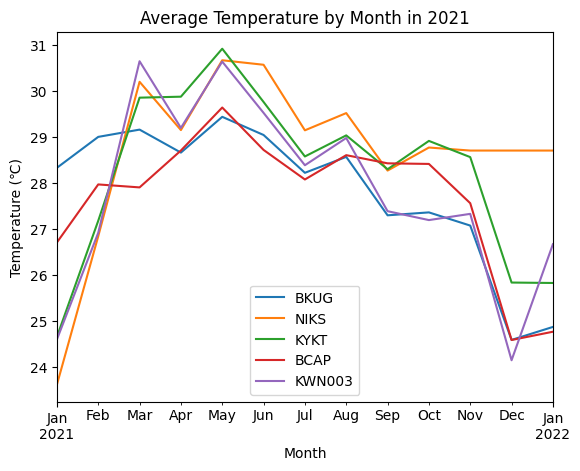

In [ ]:
import matplotlib.pyplot as plt

# Convert the Days and Hours columns to a datetime column
df['Date'] = pd.to_datetime(df['date'], unit='D', origin='2021-01-01') + pd.to_timedelta(df['hour'], unit='h')

# Drop the Days and Hours columns
df = df.drop(columns=['date', 'hour'])

# Resample the data to calculate the monthly average temperature for each station
monthly_avg = df.resample('M', on='Date').mean()

# Plot the average temperature for each station by month
fig, ax = plt.subplots()
monthly_avg.plot(ax=ax, y=['BKUG', 'NIKS', 'KYKT', 'BCAP', 'KWN003'])

# Set the title and labels
ax.set_title('Average Temperature by Month in 2021')
ax.set_xlabel('Month')
ax.set_ylabel('Temperature (℃)')

# Show the plot
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Convert the date and hour columns to a datetime column

# Split the data into input features (X) and target variable (y)
X = df.drop(columns=['BKUG', 'Date'])
y = df['BKUG']

df

,BKUG,NIKS,KYKT,BCAP,PKTG,KKCN,UDMS,NGPH,NAPK,BHRA,...,BKC006,FROC02,FROC01,CAN001,ONWR01,KPNT,AIT001,KWN003,PWA004,Date
0,28.0,19.1,20.1,18.2,16.3,18.2,17.4,14.1,15.6,15.5,...,23.4,21.0,21.9,21.1,20.8,14.7,24.1,21.7,20.6,2021-01-02 00:00:00
1,28.0,17.9,19.3,17.6,15.4,18.3,16.0,13.6,15.5,15.3,...,22.7,20.2,21.1,21.0,20.6,14.5,23.5,21.2,20.1,2021-01-02 01:00:00
2,28.0,19.1,19.0,17.2,15.0,20.6,15.2,13.3,15.4,14.8,...,21.5,19.7,20.3,20.3,17.9,14.1,22.8,20.6,19.5,2021-01-02 02:00:00
3,28.0,18.6,19.2,16.9,14.5,20.7,14.9,13.0,15.2,14.6,...,21.0,19.8,19.6,19.8,16.8,13.4,22.4,19.8,20.5,2021-01-02 03:00:00
4,28.0,16.9,18.8,17.7,14.1,20.7,15.1,12.9,15.0,14.4,...,20.7,19.2,19.0,19.2,18.4,12.9,21.9,19.9,19.6,2021-01-02 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,22.6,28.7,26.1,23.4,26.9,24.2,27.1,22.9,23.3,23.6,...,29.5,27.2,27.7,27.6,23.0,22.1,29.8,26.9,27.4,2022-01-01 19:00:00
8756,21.5,28.7,24.7,22.2,26.9,22.7,27.1,21.9,22.6,23.0,...,29.5,26.2,27.1,26.6,21.0,22.1,30.4,26.0,26.2,2022-01-01 20:00:00
8757,21.3,28.7,24.6,21.8,26.9,21.6,27.1,20.9,21.7,22.2,...,29.5,26.0,26.7,26.2,20.0,22.1,29.2,26.2,25.7,2022-01-01 21:00:00
8758,20.9,28.7,24.3,21.6,26.9,21.2,27.1,20.1,21.0,21.3,...,29.5,25.6,26.5,25.4,19.5,22.1,29.0,25.9,24.6,2022-01-01 22:00:00


Mean squared error: 2.62


<ipython-input-8-3314712931ba>:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  next_year_df[column] = 0
<ipython-input-8-3314712931ba>:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  next_year_df[column] = 0
<ipython-input-8-3314712931ba>:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  next_yea

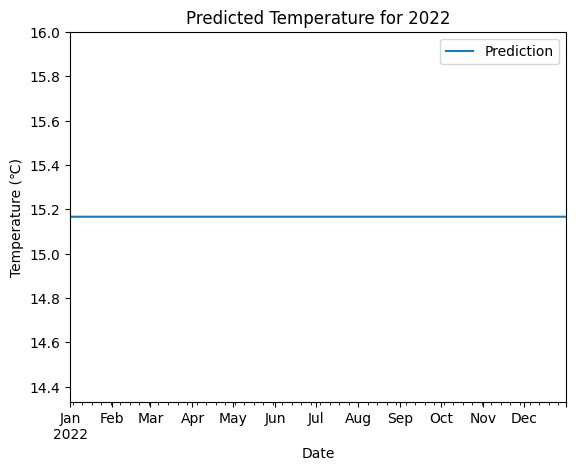

In [ ]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and train a random forest regressor
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_val, y_pred)
print(f'Mean squared error: {mse:.2f}')

# Create a DataFrame with the dates and hours for the next year
next_year = pd.date_range(start='2022-01-01', end='2022-12-31 23:00:00', freq='H')
next_year_df = pd.DataFrame({'Date': next_year})
next_year_df['date'] = next_year_df['Date'].dt.dayofyear
next_year_df['hour'] = next_year_df['Date'].dt.hour

# Add missing columns to the next_year_df DataFrame
for column in X.columns:
    if column not in next_year_df.columns:
        next_year_df[column] = 0

# Make predictions for the next year
next_year_pred = model.predict(next_year_df[X.columns])

# Add the predictions to the DataFrame
next_year_df['Prediction'] = next_year_pred

# Plot the predictions for the next year
fig, ax = plt.subplots()
next_year_df.plot(ax=ax, x='Date', y='Prediction')

# Set the title and labels
ax.set_title('Predicted Temperature for 2022')
ax.set_xlabel('Date')
ax.set_ylabel('Temperature (℃)')

# Show the plot
plt.show()